In [1]:
# Add your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
%matplotlib inline

/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Preprocess and clean
for actor_type in ["persons", "locations", "organizations"]:
    actor = pd.read_csv(actor_type+"_occurences_day.csv").dropna()

    actor = actor.sort_values(['Year', 'Month', 'Day', 'Count'], ascending=[True, True, True, False])

    actor.Year = actor.Year.astype(int)
    actor.Month = actor.Month.astype(int)
    actor.Day = actor.Day.astype(int)

    actor['Date'] = actor.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']), axis=1)
    actor = actor.drop(columns = ['Day', 'Month', 'Year'])
    actor = actor.set_index('Date')

    actor.to_csv(actor_type+"_final.csv", sep=",")

In [3]:
# date: "yyyy-mm-dd"
def wordcloud_persons(date, nb_items):
    persons = pd.read_csv("persons_final.csv")
    persons = persons[persons.Date == date]
    persons = persons.head(nb_items)
    persons = persons.set_index("Actor")
    wordcloud = WordCloud(width=1080, height=920, margin=0).generate_from_frequencies(persons.to_dict()['Count'])
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [4]:
# date: "yyyy-mm-dd"
def wordcloud_countries(date, nb_items):
    locations = pd.read_csv("locations_final.csv")
    locations = locations[locations.Date == date]
    locations = locations[locations.Actor.str.startswith('1')]
    locations.Actor = locations.Actor.str.split('#').str[1]
    locations = locations.groupby('Actor').sum()
    locations = locations.sort_values('Count', ascending=False)
    locations = locations.head(nb_items)
    wordcloud = WordCloud(width=1080, height=920, margin=0).generate_from_frequencies(locations.to_dict()['Count'])
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [5]:
# date: "yyyy-mm-dd"
def wordcloud_cities(date, nb_items):
    locations = pd.read_csv("locations_final.csv")
    locations = locations[locations.Date == date]
    locations = locations[locations.Actor.str.startswith('3') | locations.Actor.str.startswith('4')]
    locations.Actor = locations.Actor.str.split('#').str[1]
    locations.Actor = locations.Actor.str.split(',').str[0]
    locations = locations.groupby('Actor').sum()
    locations = locations.sort_values('Count', ascending=False)
    locations = locations.head(nb_items)
    wordcloud = WordCloud(width=1080, height=920, margin=0).generate_from_frequencies(locations.to_dict()['Count'])
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [6]:
# date: "yyyy-mm-dd"
def wordcloud_organizations(date, nb_items):
    organizations = pd.read_csv("organizations_final.csv")
    organizations = organizations[organizations.Date == date]
    organizations = organizations.head(nb_items)
    organizations = organizations.set_index("Actor")
    wordcloud = WordCloud(width=1080, height=920, margin=0).generate_from_frequencies(organizations.to_dict()['Count'])
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Example: A magnitude-7.8 earthquake struck Nepal on April 25 2015, killing more than 8,800 people.

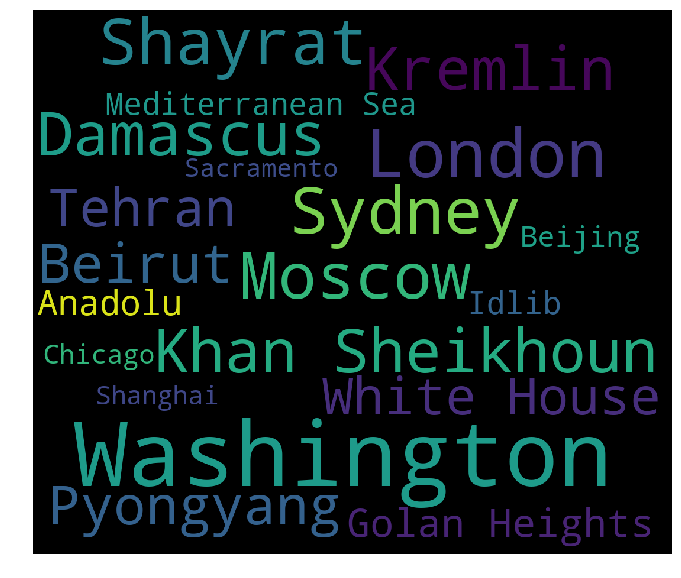

In [24]:
wordcloud_cities("2017-04-07",20)

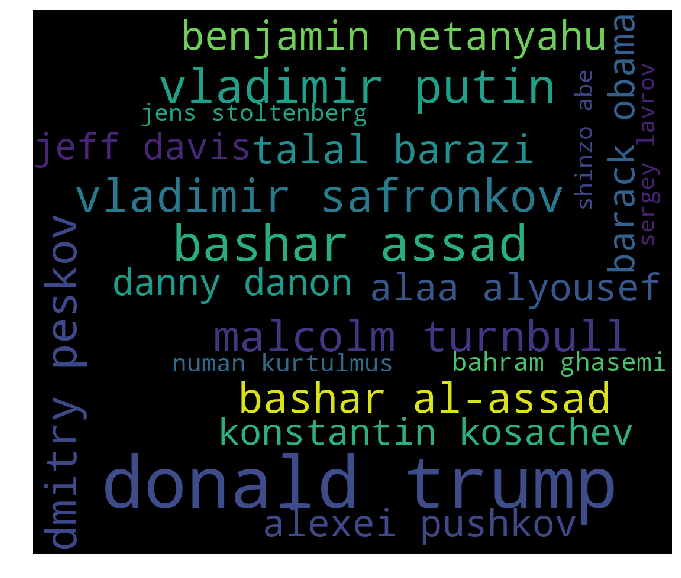

In [25]:
wordcloud_persons("2017-04-07", 20) 

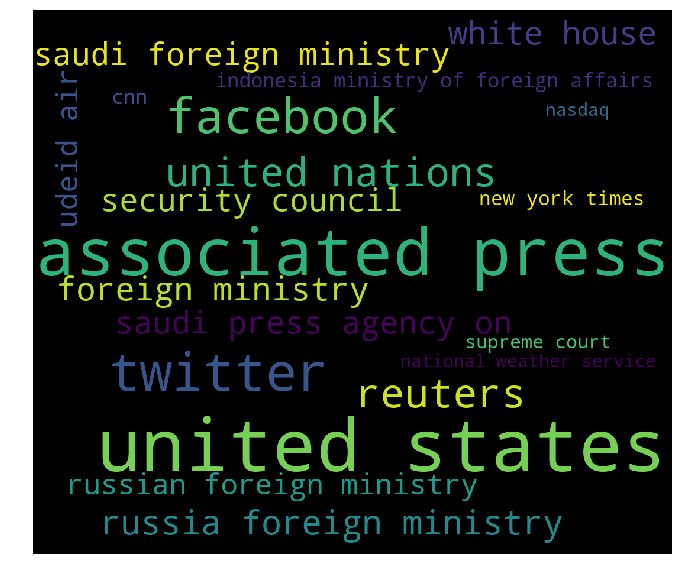

In [26]:
wordcloud_organizations("2017-04-07", 20) 